In [24]:
import sys
sys.path.append('../')  # this will make the parent directory visible

In [31]:
import os
import csv
import cv2
import numpy as np
import glob
from utils import render_img
import matplotlib.pyplot as plt

In [26]:
# Hyperparameters

# TODO: Email Eiko to learn about what was meant by yellow cast
HSVMIN = (30, 170, 0)
HSVMAX = (65, 255, 255)

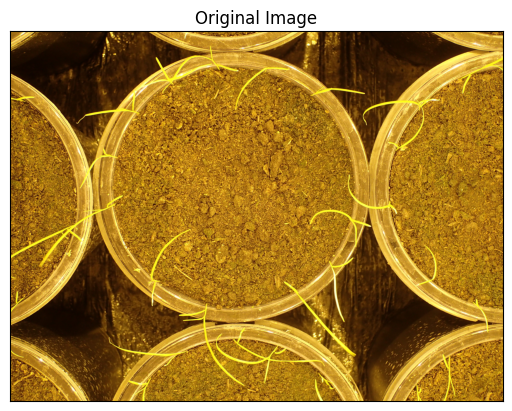

In [27]:
# Import image 
img = cv2.imread('../datasets/niab/EXP01/Top_Images/Top_Images_Clean_Rename/EXP01_Block01/EXP01_Block01_Rename06_20201204/Exp01_Block01_Image06_Pot034.jpg')

# Display image
render_img.show_rgb_image(img, 'Original Image')

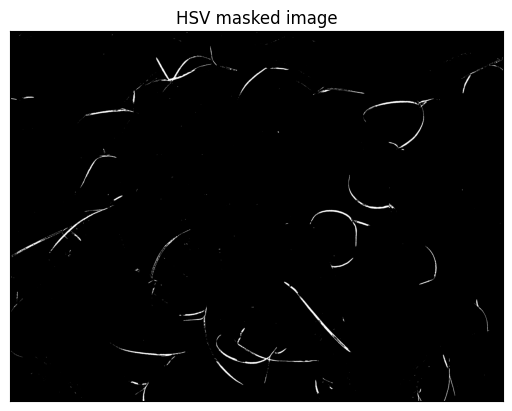

In [38]:
# Set minimum and max HSV values to display (i.e. only show colours within this range)
lower = np.array(HSVMIN)
upper = np.array(HSVMAX)

# Create HSV Image and threshold into a range.
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask_raw = cv2.inRange(hsv_img, lower, upper)

# Display image
render_img.show_rgb_image(mask_raw, 'HSV masked image', cv2.COLORMAP_JET)

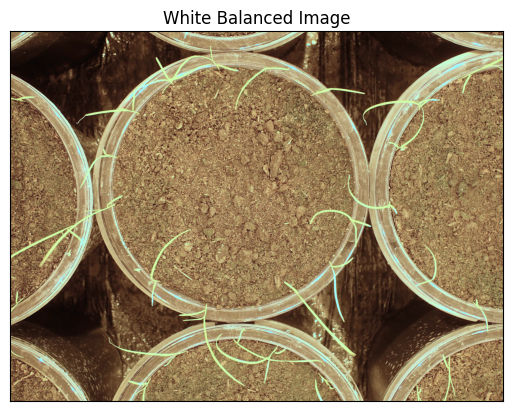

In [35]:
# https://stackoverflow.com/questions/46390779/automatic-white-balancing-with-grayworld-assumption/46391574
def white_balance(img):
    result = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result = cv2.cvtColor(result, cv2.COLOR_LAB2BGR)
    return result


wb_img = white_balance(img)

# Display image
render_img.show_rgb_image(wb_img, 'White Balanced Image')

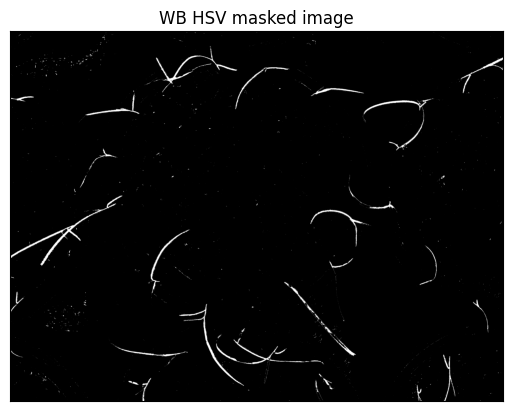

In [39]:
# Set minimum and max HSV values to display (i.e. only show colours within this range)
lower = np.array((30, 80, 0))
upper = np.array((65,255, 255))

# Create HSV Image and threshold into a range.
hsv_img = cv2.cvtColor(wb_img, cv2.COLOR_BGR2HSV)
mask_wb = cv2.inRange(hsv_img, lower, upper)

# Display image
render_img.show_rgb_image(mask_wb, 'WB HSV masked image', cv2.COLORMAP_JET)

# Ends up being a little bit noiser rather than HSV filtering on the original image

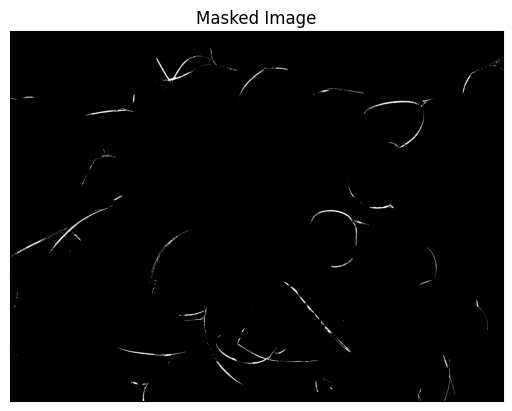

In [40]:
# The result is a new mask where a pixel is set to true (or non-zero) only if the 
# corresponding pixel in both mask_raw and mask_wb is true. This is often used in 
# image processing to combine two masks, effectively finding the intersection of the areas they cover.
mask = cv2.bitwise_and(mask_raw, mask_wb)
render_img.show_rgb_image(mask, 'Masked Image', cv2.COLORMAP_JET)

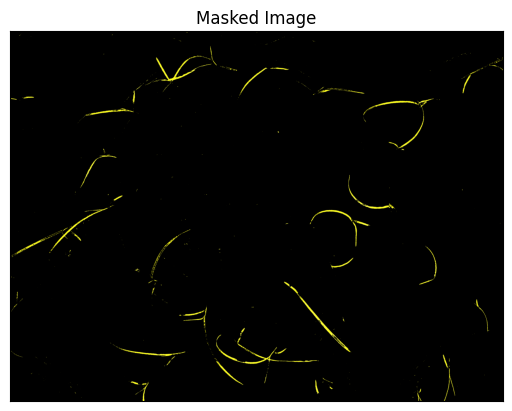

In [42]:
# Check the quality of the mask by displaying only the masked parts of the  original image
masked_img = cv2.bitwise_and(img, img, mask=mask_raw)
render_img.show_rgb_image(masked_img, 'Masked Image')

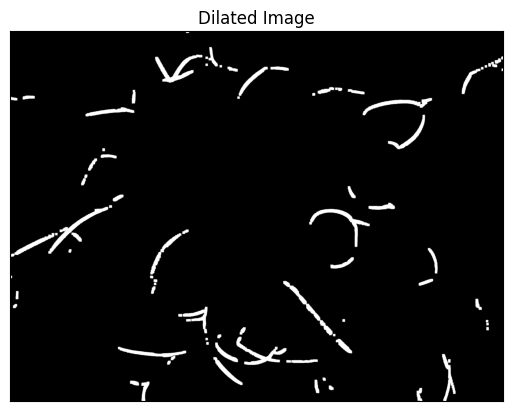

In [48]:
# The cv2.dilate() function is used to perform dilation, which is one of the basic operations in morphological transformations. Dilation adds pixels to the boundaries of objects in an image.

# Here's a step-by-step explanation:

# kernel = np.ones((3,3), np.uint8): This line creates a 3x3 matrix (also known as a kernel or structuring element) filled with ones. This kernel will be used for the dilation operation.

# output = cv2.dilate(mask, kernel, iterations=10): This line applies the dilation operation to the mask image. The dilation operation works by convolving the kernel and image. A pixel in the original image (either 1 or 0) will be considered 1 if at least one pixel under the kernel is 1. The result is a new image (output) where the white regions (where pixel values are non-zero) have been "expanded", and the black regions have been "shrunk".

# The iterations=10 parameter means that the dilation operation is applied 10 times. Each iteration will expand the white regions and shrink the black regions further. This can be used to fill small holes, expand existing regions, or connect separate regions.


# Changing the kernel size can indeed affect the amount of noise in the image after dilation. However, it might not be the most effective way to remove noise points.

# A smaller kernel will dilate the image less, which might help to preserve smaller details and reduce the enlargement of noise. However, it will also be less effective at expanding the regions of interest.

# If you're dealing with noise in your image, a better approach might be to use morphological opening or closing operations, which are specifically designed to reduce noise.

# Morphological opening is an erosion followed by a dilation. It is useful for removing noise:

# opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
# Morphological closing is a dilation followed by an erosion. It is useful in closing small holes or dark spots within an object:

# )
# You can adjust the kernel size and the number of iterations to see what works best for your specific image.

kernel = np.ones((3,3), np.uint8)

opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
# closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=100)
output = cv2.dilate(opening, kernel, iterations=10)

render_img.show_rgb_image(output, 'Dilated Image', cv2.COLORMAP_JET)

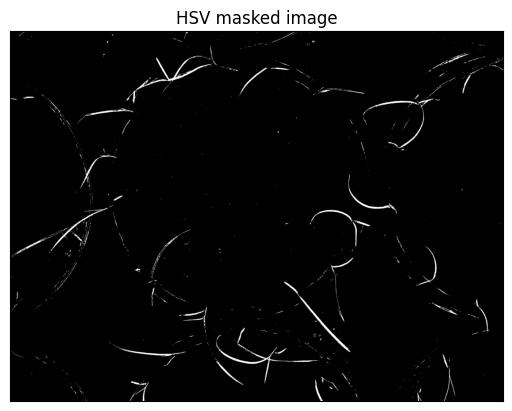

In [49]:
# Use the same HSV segmentation to segment the pot boundary
# Determine if a shoot belongs to the pot or not if starts from the pot boundary

In [ ]:
# TODO: Understand HSV code step-by-step
# TODO: Attempt to improve segmentation with some processing
# TODO: Segment subset of images, manually clean up masks
# TODO: Train a model to segment plants automatically
# TODO: Observe the results of the model vs the HSV segmentation with post-processing (i.e. is it able to learn from the manual cleaning?)